<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [169]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

NOTE: All CSVs are in the same directory as this notebook

In [170]:
sat = pd.read_csv('sat_scores.csv')
sat.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


### 1.1 Make a pandas DataFrame object with pandas `.read_csv()` function

Take a look at the `.dtypes` attribute in the DataFrame. 

In [171]:
sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

### 1.2 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [172]:
sat.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [173]:
sat.shape

(52, 4)

Rate(integer): Rate of Participation per state  
Verbal(integer): Average score on verbal portion of SAT per state   
Math(integer): Average score on math portion of SAT per state 

Shape of data set: 52 rows, 4 columns

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

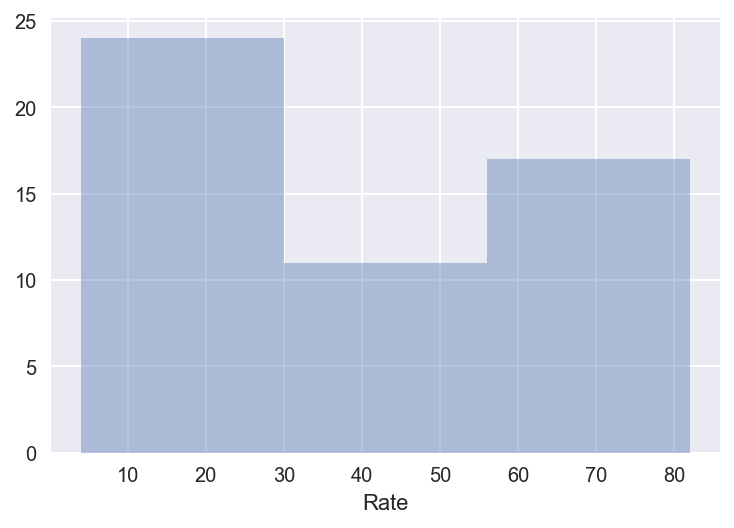

In [174]:
sns.distplot(sat['Rate'], kde=False)

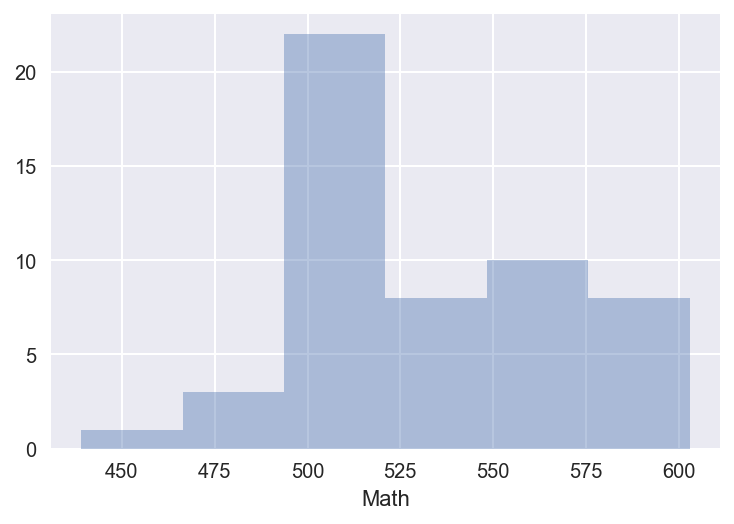

In [175]:
sns.distplot(sat['Math'], kde=False)

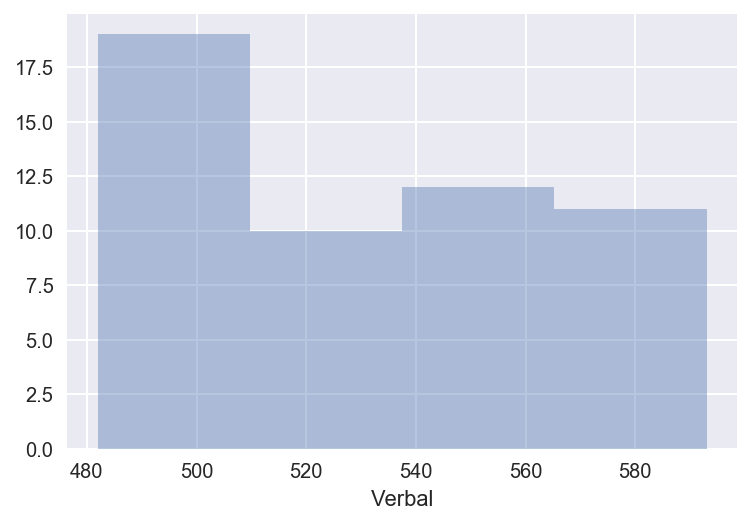

In [176]:
sns.distplot(sat['Verbal'], kde=False)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

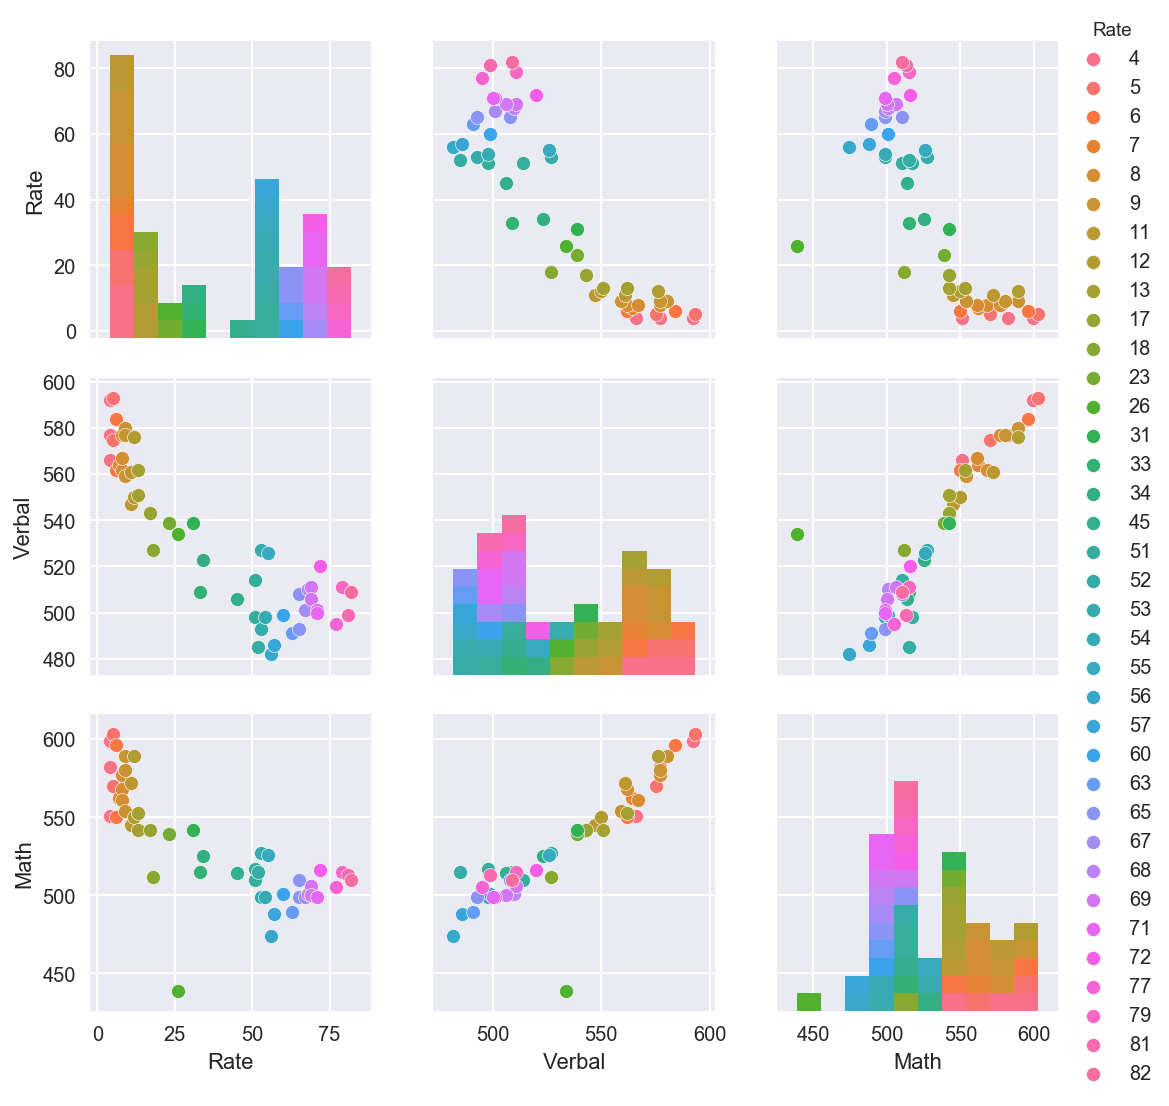

In [177]:
# Plotting the three variables to see relationships against each other
# with a hue showing the Rate feature and how those tend to be grouped together
# Easy to see here that as Rate increases, the Math and Verbal scores decrease
sns.pairplot(sat, hue='Rate')

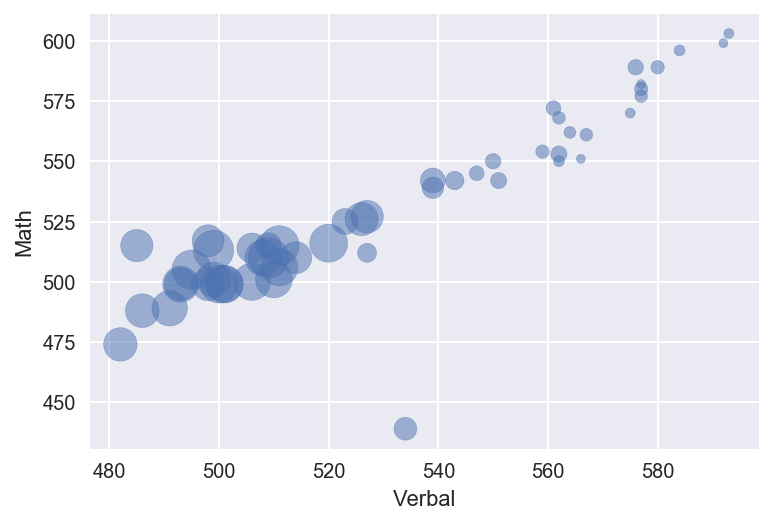

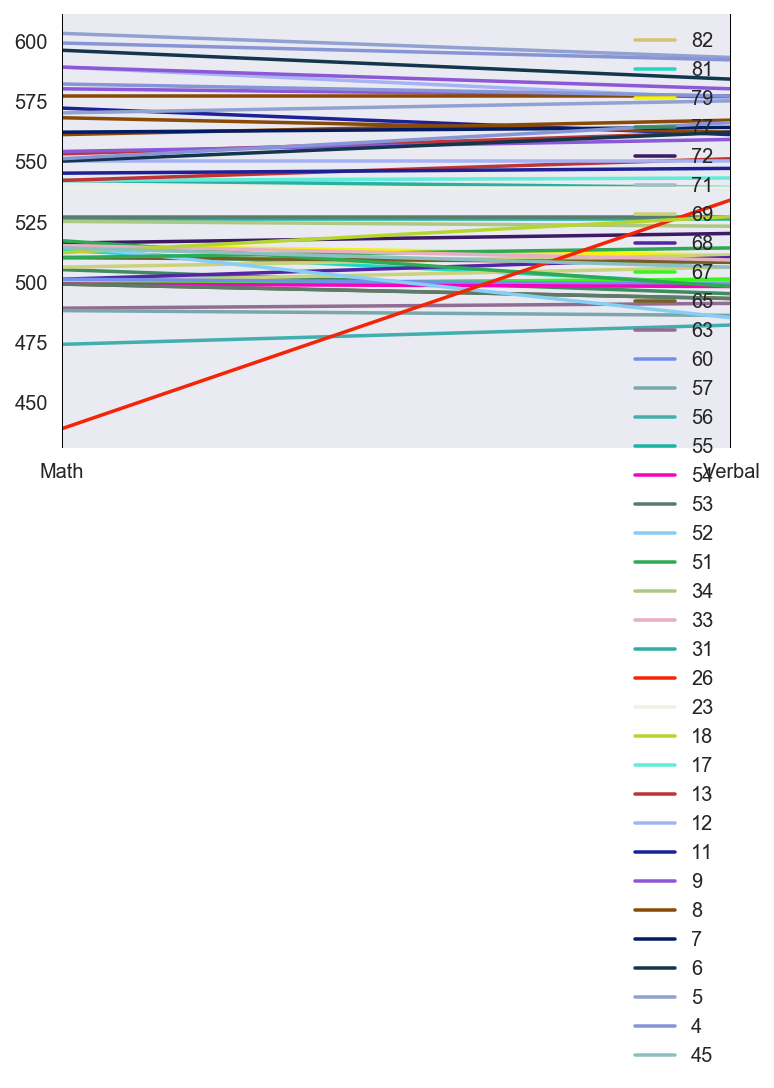

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

In [156]:
#scatter matrix
#bubble
#sat.plot.scatter(s=rate*5)

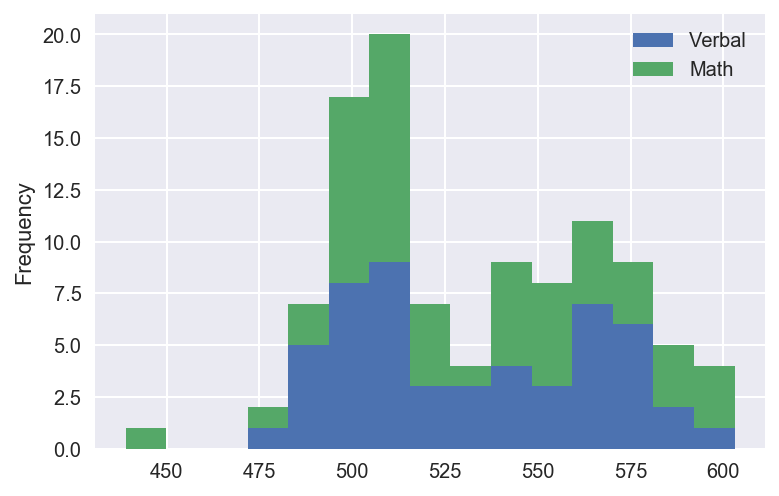

In [157]:
sat[['Verbal', 'Math']].plot.hist(stacked=True, bins=15)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

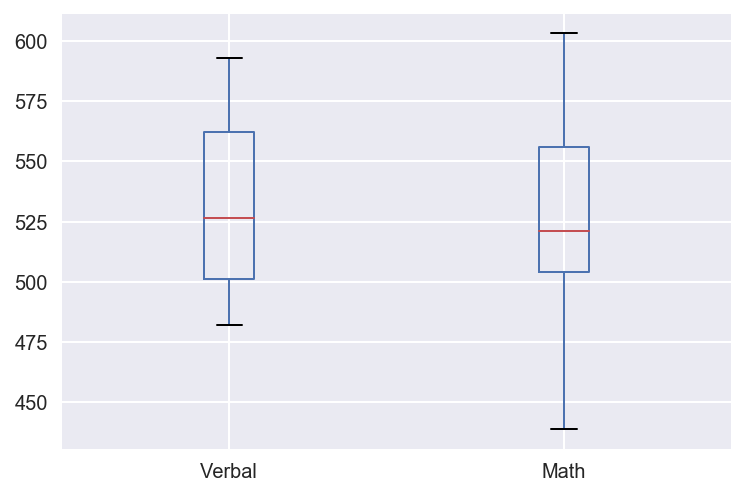

In [158]:
sat[['Verbal', 'Math']].plot.box()

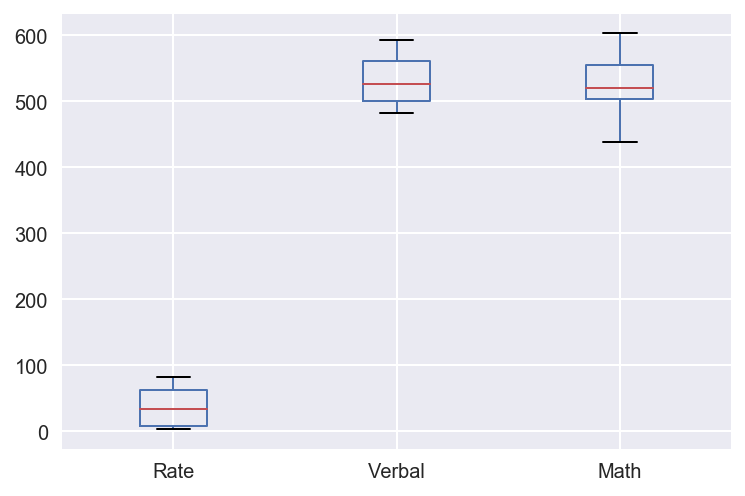

In [159]:
sat[['Rate', 'Verbal', 'Math']].plot.box()

## Eric's Answer:
Plotting the Rate data alongside the Verbal and Math data doesn't really work because the Rate data uses y-values between 0 and 100 (by definition, a rate will always do this) and the Math and Verbal data will have values between 430 and 610. Having values such far apart make it difficult to see any comparison between rate and the two SAT scores. Additionally, doing this stretches the y-axis out even more and makes the boxes smaller and more difficult to make comparisons.

## A couple additional plots

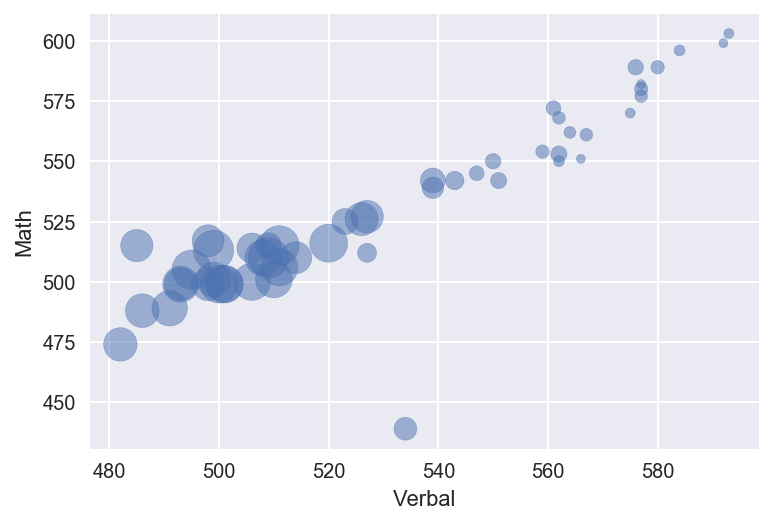

In [180]:
# A really useful bubble plot between Verbal and Math, with the size of the bubbles referencing the Rate.
# Easy to see a nice positive relationship between Verbal and Math, with one notable outlier.
# Again, the larger bubbles tend to have lower scores.
sat.plot.scatter('Verbal', 'Math', s=sat['Rate']*5, alpha=0.5)

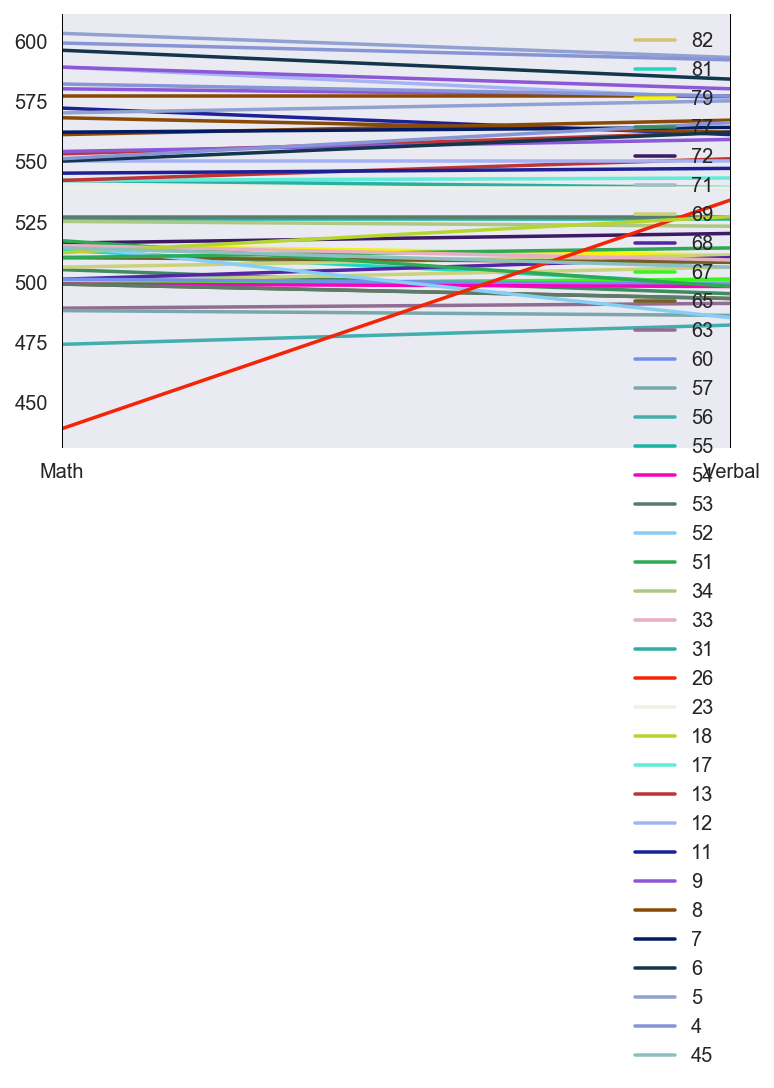

In [181]:
# This is a parallel coordinate plot which shows the Math scores on the left and the Verbal scores on the right
# Fairly flat lines, with the exception of the red line, which turns out to be Ohio
from pandas.plotting import parallel_coordinates

sat_no_state = sat[['Rate', 'Math', 'Verbal']].copy()

parallel_coordinates(sat_no_state, 'Rate')

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have an average `Verbal` score greater than the average of `Verbal` scores across the entire dataset

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




## Eric's Answer:
There are 24 states that have a higher average score that is greater than the nationwide mean verbal score. This me that the lower the rate of participation, the Verbal score tends to increase. Presumably, this is because only more intelligent students are taking the SAT in these states as it appears to be optional, or in addition to another standardaized test.

In [160]:
# Return only states that have average Verbal scores above the overall mean Verbal score
sat.loc[sat['Verbal'] > sat['Verbal'].mean()]

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


In [161]:
# 24 stats with a Verbal score higher than the mean
sat.loc[sat['Verbal'] > sat['Verbal'].mean()].count()

State     24
Rate      24
Verbal    24
Math      24
dtype: int64

### 5.2 Find the list of states that have a median `Verbal` score greater than the median of `Verbal` scores across the entire dataset

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [162]:
# Return only states that have average Verbal scores above the overall median Verbal score
sat.loc[sat['Verbal'] > sat['Verbal'].median()]

,State,Rate,Verbal,Math
19,WA,53,527,527
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
29,WV,18,527,512
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550


In [182]:
# Returns 26 states
sat.loc[sat['Verbal'] > sat['Verbal'].median()].count()

State     26
Rate      26
Verbal    26
Math      26
dtype: int64

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [183]:
# Create new column 'Differnce' that is the difference between Verbal and Math
sat['Difference'] = sat['Verbal'] - sat['Math']
sat.head()

,State,Rate,Verbal,Math,Difference
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [184]:
# Create new DataFrame of the 10 states with the greatest difference in Verbal and Math
sat_diff_top_10 = sat.sort_values('Difference', ascending=False).head(10)
sat_diff_top_10.head(3)

,State,Rate,Verbal,Math,Difference
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [185]:
# Create new DataFrame of the 10 states with the greatest difference in Verbal and Math, where Math is greater
sat_diff_bottom_10 = sat.sort_values('Difference').head(10)
sat_diff_bottom_10.head(3)

,State,Rate,Verbal,Math,Difference
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).


- Use seaborn's `.heatmap` method to add some color to the matrix
- Set `annot=True`


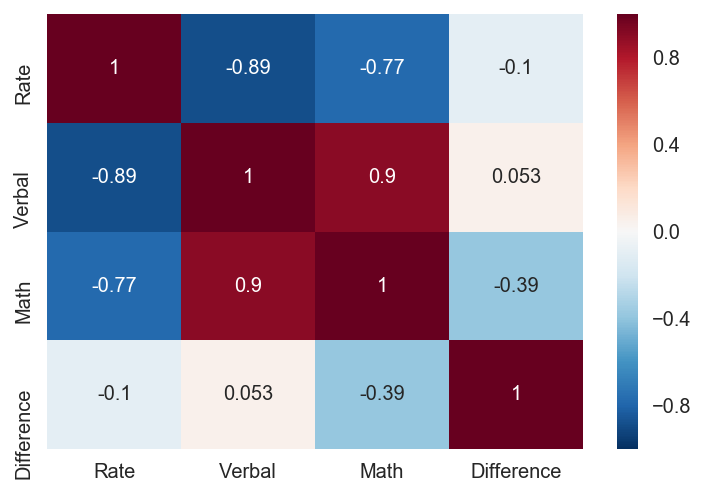

In [166]:
# Show correlation between variables
sat_corr = sat.corr()
sns.heatmap(sat_corr, annot=True)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [167]:
sat.describe()

,Rate,Verbal,Math,Difference
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

## Eric's Answer
While there are no null values, there is data missing. Wherever there is a 0.0 in the 'use' column of a particular drug, there is a '-' in the corresponding 'frequency' column. Because of that, those columns are strings. To change that, I have replaced all of the '-' with 0.0, and then change all of those columns to floats. That way, I can perform EDA with all columns (except 'age', which stays a string because it contains ranges of ages).

In [188]:
# Read in csv, save it as drugs DataFrame
drugs = pd.read_csv('drug-use-by-age.csv')

In [189]:
drugs.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [190]:
# Replace all '-' with 0
# Since the '-' only appear in the frequency columns when the corresponding usage is 0, 
# we can safely assume that the frequency is also 0 without compromising the data
drugs.replace('-', 0, inplace=True)

In [191]:
# Notice that all of the columns that had '-' are still strings
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [192]:
# Change all of the string columns to floats
drugs['cocaine-frequency'] = drugs['cocaine-frequency'].astype(float)
drugs['crack-frequency'] = drugs['crack-frequency'].astype(float)
drugs['heroin-frequency'] = drugs['heroin-frequency'].astype(float)
drugs['inhalant-frequency'] = drugs['inhalant-frequency'].astype(float)
drugs['oxycontin-frequency'] = drugs['oxycontin-frequency'].astype(float)
drugs['meth-frequency'] = drugs['meth-frequency'].astype(float)

In [193]:
# Successfully converted
# The only column that is still a string is age, which has age ranges in some of the rows, so it must remain a string
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

In [194]:
drugs.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.411765,0.294118,12.382353,0.352941,...,0.935294,13.941176,2.805882,11.735294,1.917647,31.147059,0.382353,31.735294,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.014119,0.235772,17.361532,0.333762,...,0.608216,12.902134,1.753379,11.485205,1.407673,85.973790,0.262762,32.206423,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,2.000000,0.100000,...,0.400000,5.000000,1.400000,6.000000,0.600000,7.000000,0.200000,10.500000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.000000,0.400000,6.000000,0.200000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,24.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.000000,0.500000,15.000000,0.600000,...,1.400000,17.500000,4.200000,11.000000,3.000000,12.000000,0.600000,46.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


In [195]:
drugs.shape

(17, 28)

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [196]:
drugs.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [197]:
# make two new dataframes, drugs_use and drugs_frequency, to compare all of the 'Use' columns
# and 'Frequency' columns, respectively
drugs_use = drugs.filter(regex='use')
drugs_frequency = drugs.filter(regex='frequency')

In [198]:
# Add the 'Age column to both sub-dataframes
drugs_use['age'] = drugs['age']
drugs_frequency['age'] = drugs['age']

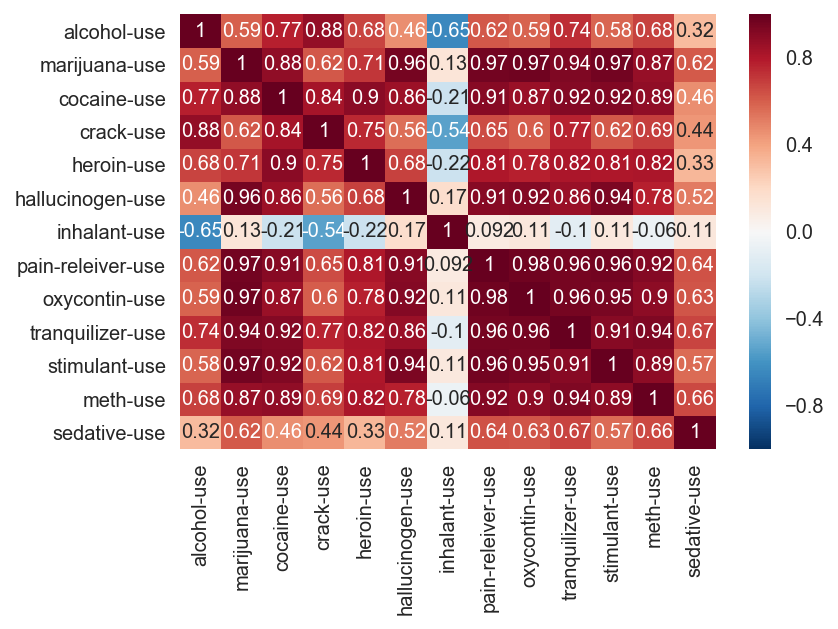

In [199]:
# Show correlation between use variables
# Notice that inhalant is a strong outlier
sns.heatmap(drugs_use.corr(), annot=True)

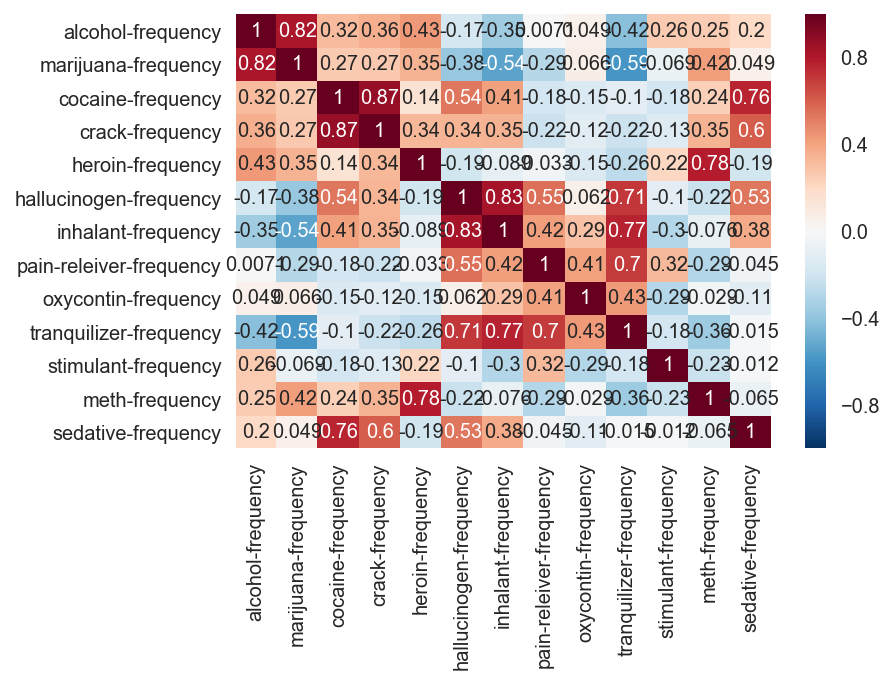

In [200]:
# Show correlation between frequency variables
sns.heatmap(drugs_frequency.corr(), annot=True)

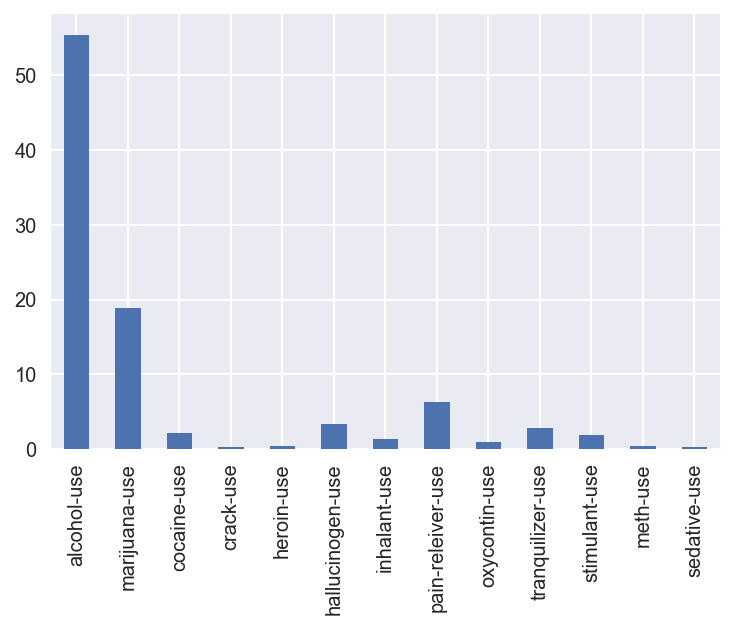

In [112]:
# Show the mean of eash use variable
drugs_use.mean().plot(kind='bar')

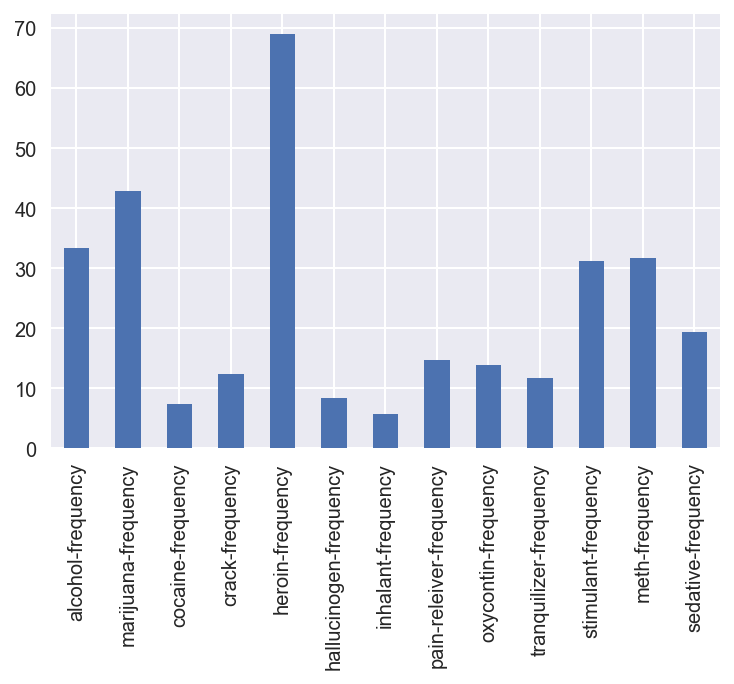

In [113]:
# Show the mean of each frequency variable
drugs_frequency.mean().plot(kind='bar')

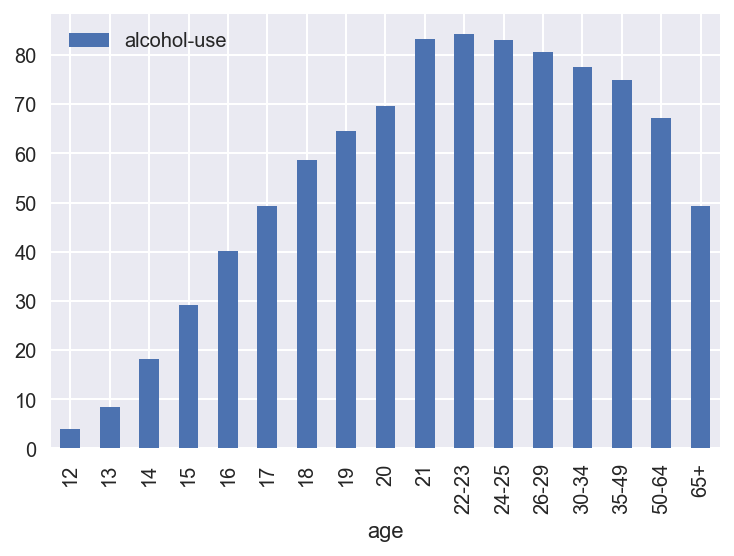

In [121]:
# Plot various use variables against the age to see the distrubution of the drug by age
drugs.plot('age', 'alcohol-use', kind='bar')

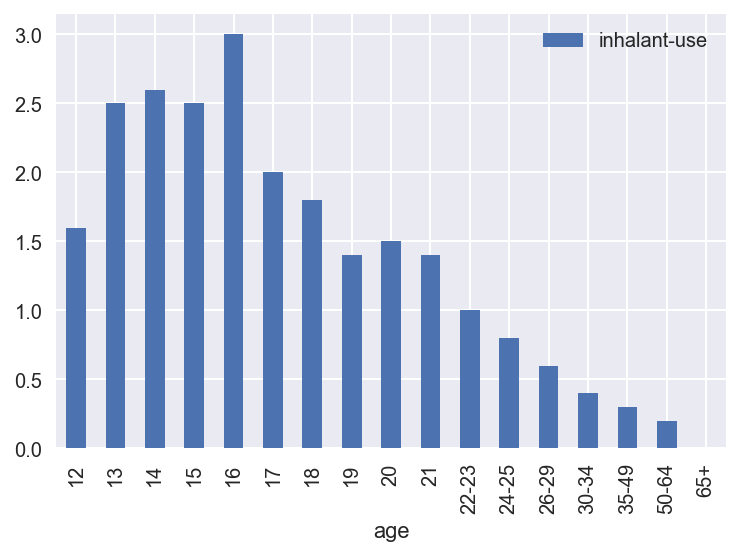

In [123]:
drugs.plot('age', 'inhalant-use', kind='bar')

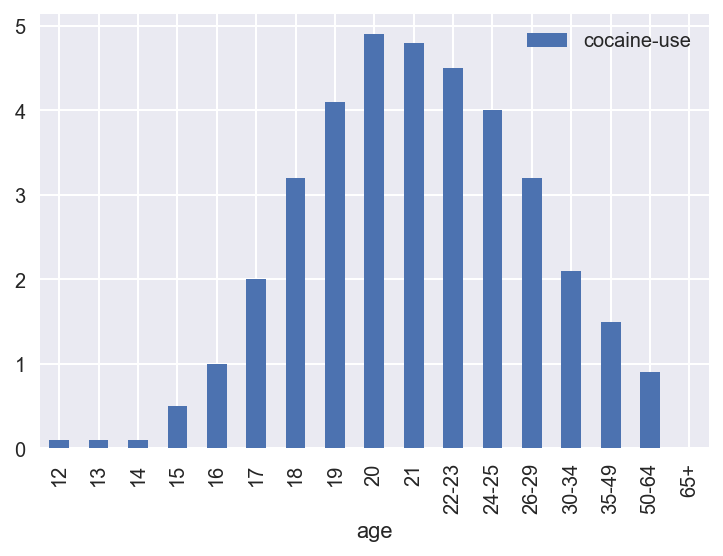

In [124]:
drugs.plot('age', 'cocaine-use', kind='bar')

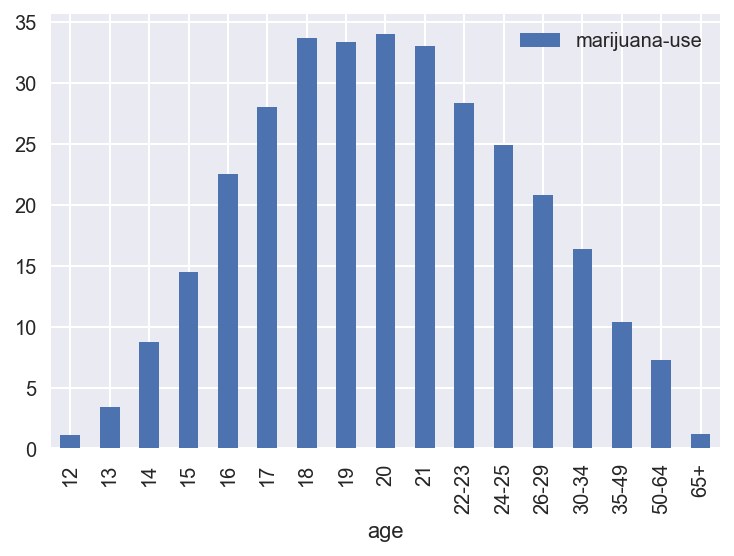

In [125]:
drugs.plot('age', 'marijuana-use', kind='bar')

drugs.plot('age', 'hallucinogen-use', kind='bar')

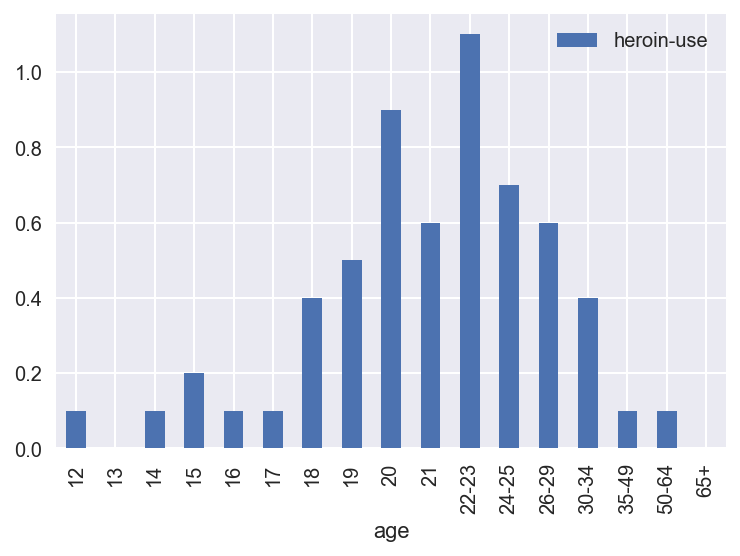

In [126]:
drugs.plot('age', 'heroin-use', kind='bar')

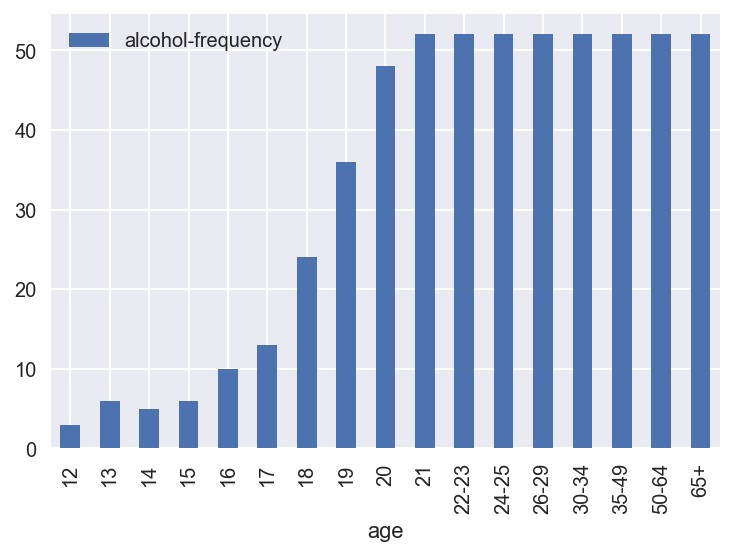

In [284]:
# Plot various frequency variables against the age to see the distrubution of the drug by age
drugs.plot('age', 'alcohol-frequency', kind='bar')

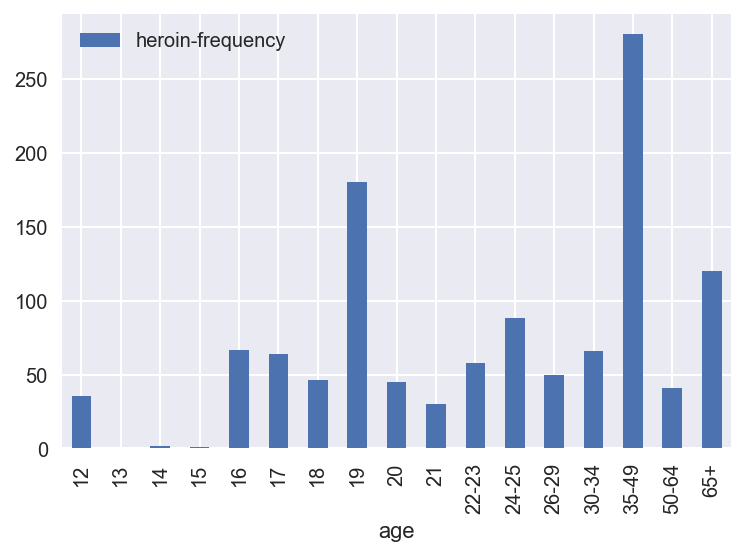

In [127]:
drugs.plot('age', 'heroin-frequency', kind='bar')

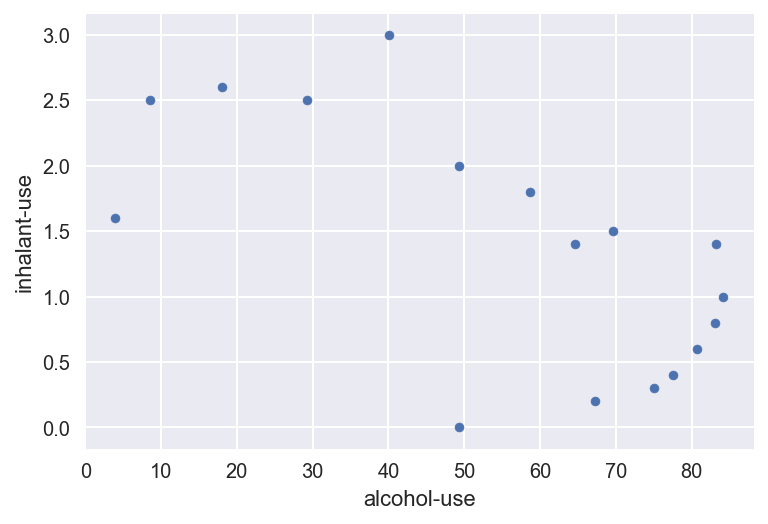

In [128]:
# Seems to be a negative correlation between alcohol and inhalant use
drugs.plot('alcohol-use', 'inhalant-use', kind='scatter')

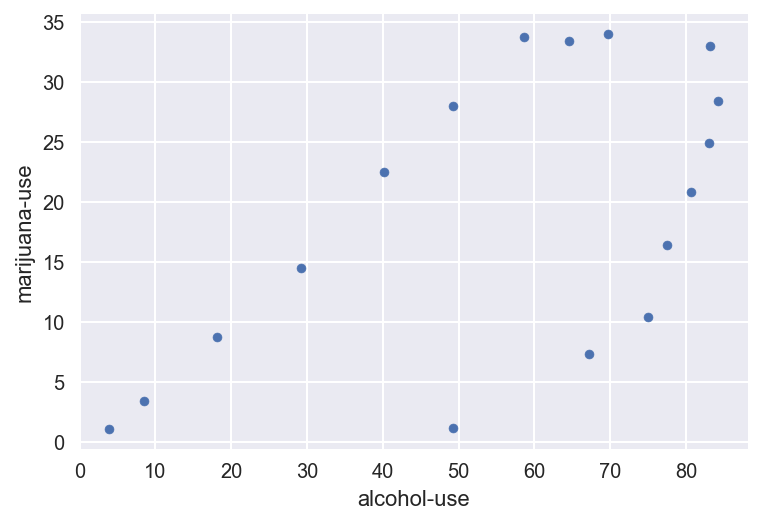

In [129]:
drugs.plot('alcohol-use', 'marijuana-use', kind='scatter')

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


My question involves comparing the usage rate of drugs and the frequency with which those drugs are used. The question is: how are usage rate and frequency of usage related? More specifically, as usage increases does frequency increase? Or is there no relationship between the two?

Null hypothesis: There is no relationship between use and frequency.
Alternate hypotheis: There is a relationship between use and frequency. As one increase, the other increases (or increases).

Deliverables: Correlation heatmaps, plots (scatter), and t-test comparing use and frequency.

In [201]:
# Code
# Create new dataframe to compare the mean usage and frequency between drugs
# Create first column using the feature names from the original dataset 
freq_use_ratio = pd.DataFrame(['alcohol', 'marijuana', 'cocaine', 'crack',
       'heroin', 'hallucinogen', 'inhalant', 'pain-releiver',
       'oxycontin', 'tranquilizer', 'stimulant', 'meth',
       'sedative'], columns=['drug'])
freq_use_ratio

,drug
0,alcohol
1,marijuana
2,cocaine
3,crack
4,heroin
5,hallucinogen
6,inhalant
7,pain-releiver
8,oxycontin
9,tranquilizer


In [202]:
# create columns showing the mean frequency and usage rate of each drug
freq_use_ratio['frequency'] = np.array(drugs_frequency.mean())
freq_use_ratio['use'] = np.array(drugs_use.mean())

# create column that is the ratio between frequency and usage rate
freq_use_ratio['freq_to_use_ratio'] = freq_use_ratio['frequency'] / freq_use_ratio['use']
freq_use_ratio

,drug,frequency,use,freq_to_use_ratio
0,alcohol,33.352941,55.429412,0.601719
1,marijuana,42.941176,18.923529,2.269195
2,cocaine,7.411765,2.176471,3.405405
3,crack,12.382353,0.294118,42.100000
4,heroin,68.970588,0.352941,195.416667
5,hallucinogen,8.411765,3.394118,2.478336
6,inhalant,5.794118,1.388235,4.173729
7,pain-releiver,14.705882,6.270588,2.345216
8,oxycontin,13.941176,0.935294,14.905660
9,tranquilizer,11.735294,2.805882,4.182390


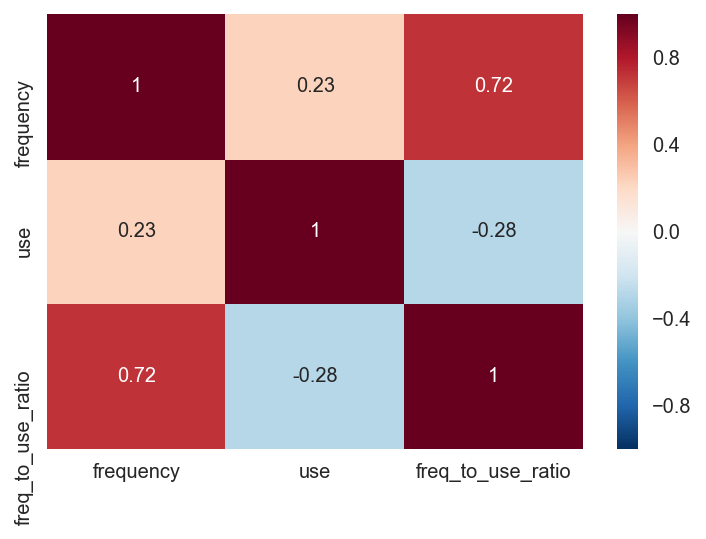

In [203]:
# correlation heatmap to compare Pearson Correlation between frequency, use and frequency to use ratio
sns.heatmap(freq_use_ratio.corr(), annot=True)

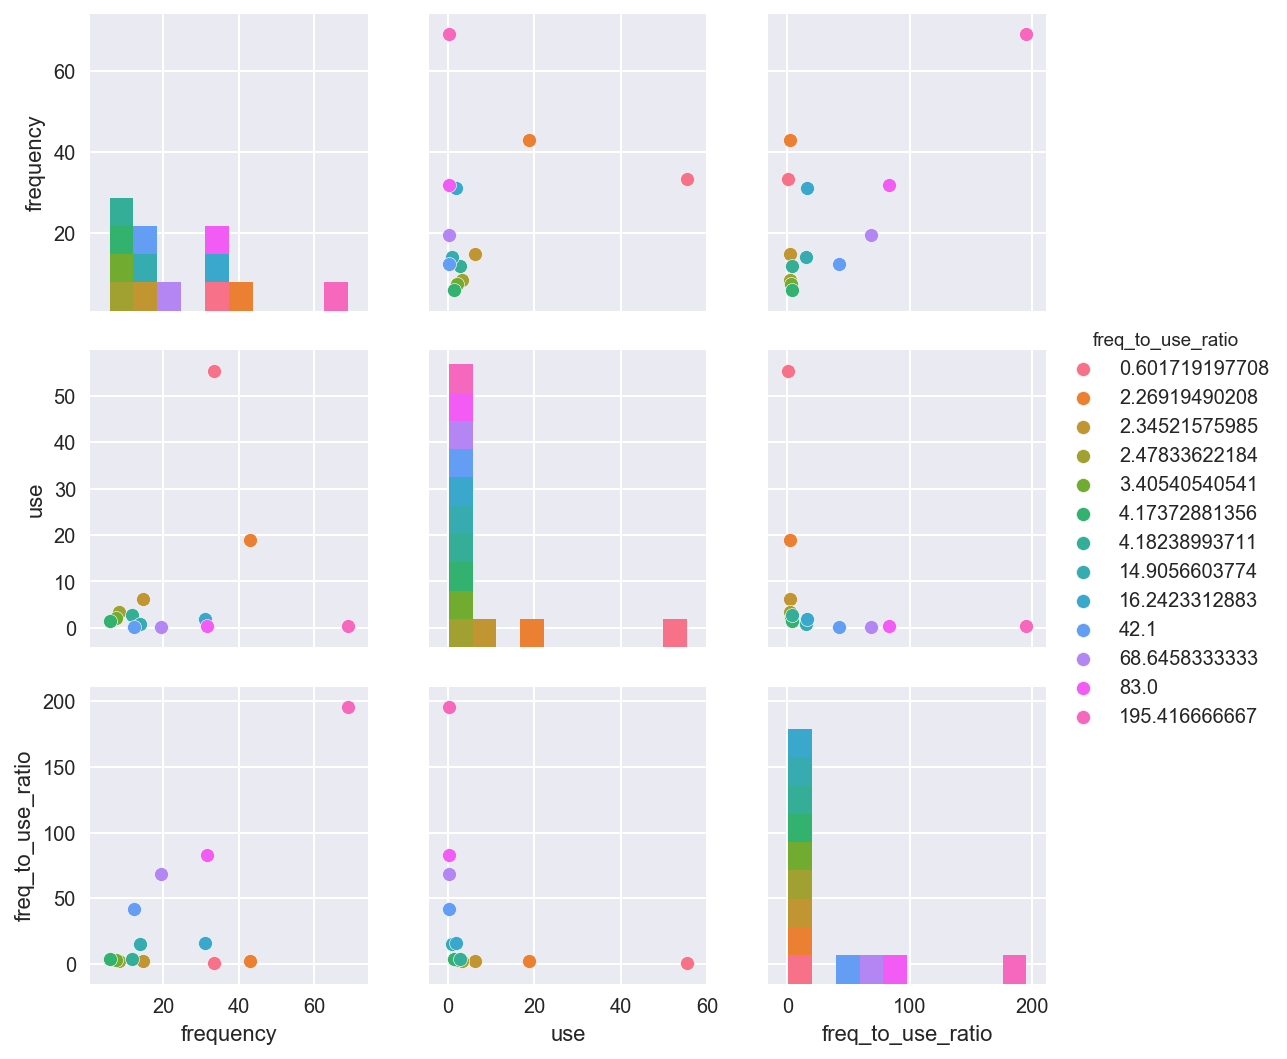

In [204]:
# pairplot to see distributions amongst the three features
sns.pairplot(data=freq_use_ratio, hue='freq_to_use_ratio')

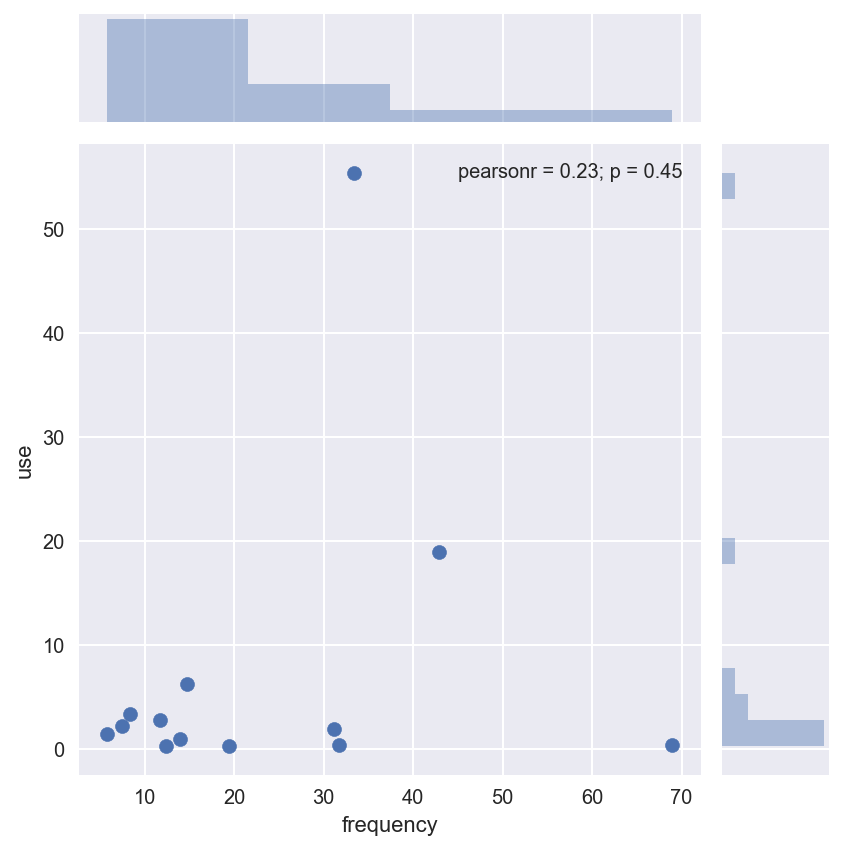

In [205]:
# scatter plot of frequency against use 
sns.jointplot('frequency', 'use', data=freq_use_ratio)

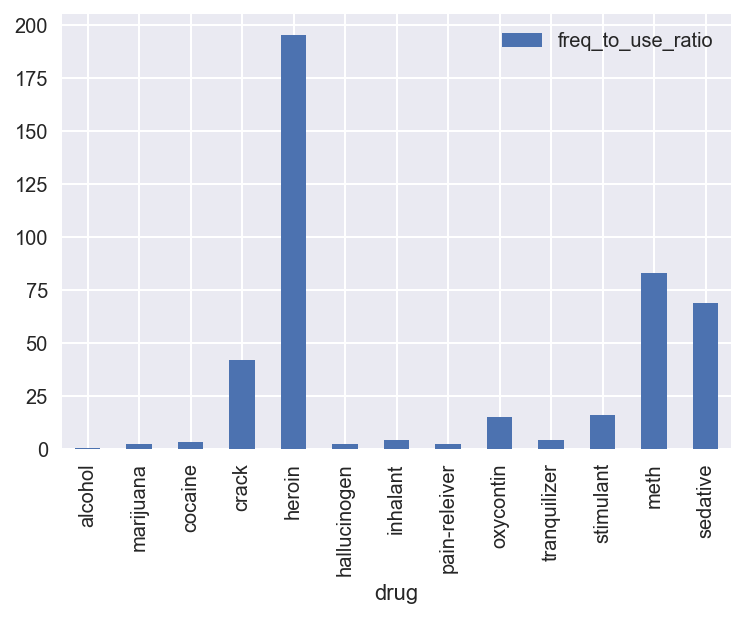

In [206]:
# bar chart showing the frequency to use ratio
# heroin has by far the largest. Meth and sedatives also are quite larg compared to the rest
freq_use_ratio.plot('drug', 'freq_to_use_ratio', kind='bar')

In [207]:
# Run t-test between frequency and use columns of the new dataframe
# print out the t-stat and p-value
t_stat, p_value = stats.ttest_ind(freq_use_ratio['use'], freq_use_ratio['frequency'])
print('t-stat:', t_stat)
print('p-value:', p_value)

t-stat: -2.4287017055
p-value: 0.0230135891589


**Report**


The first step in determing the relationship between frequency and use was to create a new DataFrame. The first column is the drug names (the feature names from the original dataset). The next two columns are the mean values between all age groups of each drug, one column for frequency and one for use. The final column is the ratio of frequency to use, which, in a single metric, can tell us if their is a large discrepancy between frequency and use.

(*it should be noted that this ratio isn't an ideal comparison of variables since frequency is a count number and use is a percentage, but it does give us a rough idea if one increases with the other or not)

The first step of the EDA is to plot the heat map of the correlations between the three variables, with the main one I'm looking at is the frequency vs use correlation, which shows a (somewhat) decent positive correlation of 0.23. Enough to do some more testing.

When I plot a frequency vs usage scatter plot, there doesn't appear to be an obvious pattern. There are some interesting things that show up however. We can see that most of the data fall in the 0-8 use rate and between 0-20 in terms of frequency. We see that the drugs with the two highest usage rates (alcohol and marijuana) also have two of the highest frequency rates. The main outlier is heroin with one of the lowest use rates but by far the highest frequency.

Next I plotted the ratio between frequency and usage. It's easy to see that heroin is the big outlier here as it has one of the smallest usage rates, but it has the largest frequency. In other words, there aren't a lot of heroin users, but for those that do, they use it a lot. Meth and sedatives have fairly large ratios as well, being used much more often compared with the total number of people that use them. It's also notable here that alcohol and marijuana have two of the lowest ratios, even with a fairly high frequency, due to such a high usage number in the denominator.

Finally, I run the t-test between frequency and use. We find there to be a t-stat of -2.43 and a p-value of 0.023. This is encouraging news because the p-value is low enough that I am confident enough to reject the null hypothesis that there is no relationship between frequency and use. 

In conclusion, I was able to reject the null hypothesis, so there does seem to be some sort of relationship between frequency and use. When we plot the two values in a scatter plot, there is not a strong relationship, so it's hard to really draw any conclusions or have any predictive power if we were to only know one of the variables. 

The relationship between the two can be very interesting, however. It was interesting to see drugs that are perhaps used by a small number of people, but used very frequently; heroin being the most notable one here as having by far the highest frequency but only used by 0.35% of people amoung all age groups. Also notable, the two most widely used drugs (alcohol and marijuana) also have two of the highest frequency numbers. This means that these two are very heavily consumbed drugs. Other drugs have small use rates and also relatively small frequencies, meaning not a very widely consumed drugs. All in all, a very intersting relationship to explore how often drugs are being used and by how many people.



<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the SAT dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [269]:
# Create new dataframe, rate
rate = sat[['Rate']].copy()

In [270]:
rate.head()

,Rate
0,82
1,81
2,79
3,77
4,72


In [273]:
rate.mean()

Rate    37.153846
dtype: float64

In [274]:
rate.median()

Rate    33.5
dtype: float64

In [275]:
rate.std()

Rate    27.301788
dtype: float64

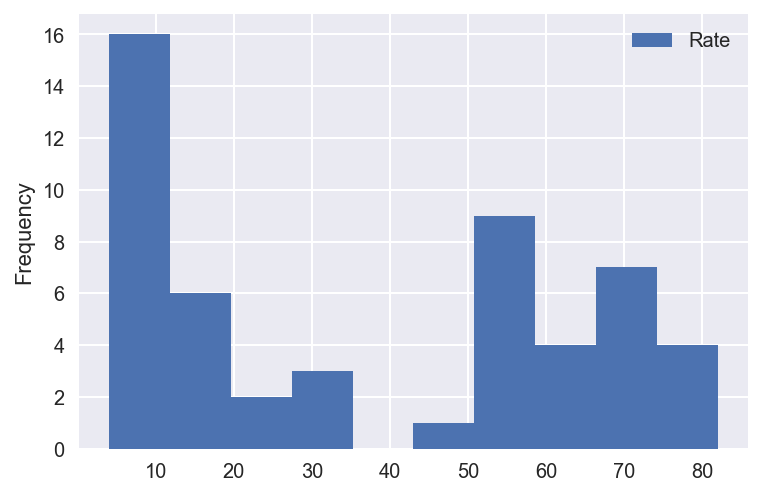

In [276]:
# Plot histogram of rate
rate.plot.hist()

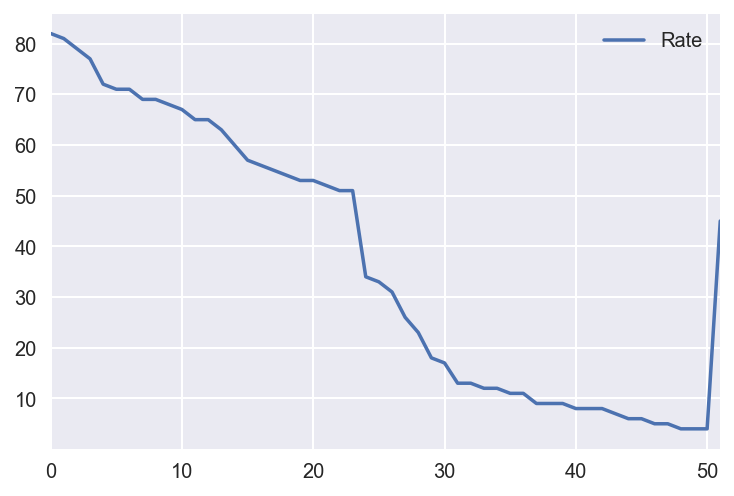

In [277]:
# Plot line chart of Rate variable
rate.plot()

A:
To me, outliers are those that are not closely associatiated with the other data. Numerically speaking, they are those that are distant from their nearest data. In this line plot, these outliers would be when the line drops or rises suddenly, meaning there is a big gap in the value. The most obvious one is the one on the far right, which is the final row of the dataset, which was the 'All' row in the original dataset. This can easily be removed.

The other outliers are less obvious. I would argue that there are two main groups of data, one group in the 50-80 range, and another in the 5-20 range. These can be labeled as the states where the SAT is the primary college entrance exam, and states where the SAT is NOT the primary college entrance exam. You can clearly see these two groups in the histogram, and you can also see them in the line plot where the line has a much more shallow slope. 

With that said, I believe anything outside of these two groups can be considered outliers. Therefore, I will remove anything with a Rate between 20 and 50.

In [278]:
# Print out the outliers
print(rate.loc[(rate['Rate'] > 20) & (rate['Rate'] < 50), :])

    Rate
24    34
25    33
26    31
27    26
28    23
51    45


In [279]:
# Create new DataFrame that removes all values above 20 and below 50
# This includes the 'All' row
rate_no_outliers = rate.loc[(rate['Rate'] <= 20) | (rate['Rate'] >= 50), :]

In [280]:
rate_no_outliers.shape

(46, 1)

In [281]:
rate_no_outliers.mean()

Rate    37.826087
dtype: float64

In [283]:
rate_no_outliers.median()

Rate    51.0
dtype: float64

In [282]:
rate_no_outliers.std()

Rate    28.883909
dtype: float64

# Answer
6. The mean and standard deviation don't change too much, as most of the outliers were actually in the middle of this particular dataset. However, the median hcanged quite a bit.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.